# Otniel Abiezer - 1301180469

## Import dan Load

Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential, Model
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import cross_val_score, train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

Mount Google Drive (dari Google Colab)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = '/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images'

Membaca seluruh file

In [ ]:
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Contoh

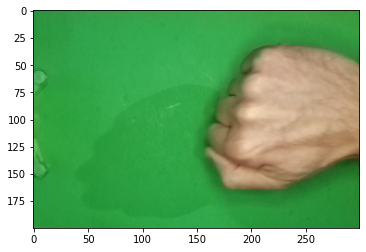

In [5]:
plt.imshow(plt.imread(base_dir+'/rock/MKU8h3j49NjuhQpi.png'))
plt.show()

Mengubah gambar menjadi array

In [6]:
batu = []
gunting = []
kertas = []

for dirname, _, filenames in os.walk(base_dir+'/rock'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      batu.append(img_array)

for dirname, _, filenames in os.walk(base_dir+'/scissors'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      gunting.append(img_array)

for dirname, _, filenames in os.walk(base_dir+'/paper'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      kertas.append(img_array)

Informasi

In [7]:
print('Banyak Gambar Batu = ', len(batu))
print('Lebar Gambar Batu = ', len(batu[0]))
print('Panjang Gambar Batu = ', len(batu[0][0]))
print('Pixel (RGB) = ', len(batu[0][0][0]))
print('Contoh Pixel = ', batu[0][0][0])

print('\nBanyak Gambar Gunting = ', len(gunting))
print('Lebar Gambar Gunting = ', len(gunting[0]))
print('Panjang Gambar Gunting = ', len(gunting[0][0]))
print('Pixel (RGB) = ', len(gunting[0][0][0]))
print('Contoh Pixel = ', gunting[0][0][0])

print('\nBanyak Gambar Kertas = ', len(kertas))
print('Lebar Gambar Kertas = ', len(kertas[0]))
print('Panjang Gambar Kertas = ', len(kertas[0][0]))
print('Pixel (RGB) = ', len(kertas[0][0][0]))
print('Contoh Pixel = ', kertas[0][0][0])

Banyak Gambar Batu =  726
Lebar Gambar Batu =  200
Panjang Gambar Batu =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 38. 124.  41.]

Banyak Gambar Gunting =  750
Lebar Gambar Gunting =  200
Panjang Gambar Gunting =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 18. 105.  27.]

Banyak Gambar Kertas =  712
Lebar Gambar Kertas =  200
Panjang Gambar Kertas =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 35. 119.  47.]


Panjang Label

In [8]:
labels = []

for i in range(len(batu)):
  labels.append(0.0)
for i in range(len(gunting)):
  labels.append(1.0)
for i in range(len(kertas)):
  labels.append(2.0)

print(len(labels))

2188


Panjang Data Image

In [9]:
images = [*batu, *gunting, *kertas]
print(len(images))

2188


Split Data Train dan Data Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=1)

X_train.shape, y_train.shape

((1750, 200, 300, 3), (1750,))

Scaling X dan One Hot Encoding y

In [11]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

## Model 1

In [12]:
tf.random.set_seed(10)

In [13]:
model = Sequential([
    Conv2D(4, (3,3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(2, 2),
    Conv2D(8, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train_scaled, y_train_oh, epochs=10, validation_data=(X_test_scaled, y_test_oh))

Epoch 1/10
55/55 [==============================] - 15s 52ms/step - loss: 0.9577 - accuracy: 0.5286 - val_loss: 0.5963 - val_accuracy: 0.7991
Epoch 2/10
55/55 [==============================] - 2s 41ms/step - loss: 0.5624 - accuracy: 0.7869 - val_loss: 0.4174 - val_accuracy: 0.8516
Epoch 3/10
55/55 [==============================] - 2s 39ms/step - loss: 0.4086 - accuracy: 0.8691 - val_loss: 0.3291 - val_accuracy: 0.8836
Epoch 4/10
55/55 [==============================] - 2s 38ms/step - loss: 0.2916 - accuracy: 0.9080 - val_loss: 0.2600 - val_accuracy: 0.9224
Epoch 5/10
55/55 [==============================] - 2s 39ms/step - loss: 0.2122 - accuracy: 0.9400 - val_loss: 0.2250 - val_accuracy: 0.9201
Epoch 6/10
55/55 [==============================] - 2s 39ms/step - loss: 0.1666 - accuracy: 0.9440 - val_loss: 0.2359 - val_accuracy: 0.9110
Epoch 7/10
55/55 [==============================] - 2s 38ms/step - loss: 0.1200 - accuracy: 0.9623 - val_loss: 0.2373 - val_accuracy: 0.9178
Epoch 8/10
5

## Model 2

In [16]:
model2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3, activation='sigmoid')
])

In [17]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history2 = model2.fit(X_train_scaled, y_train_oh, epochs=10, validation_data=(X_test_scaled, y_test_oh))

Epoch 1/10
55/55 [==============================] - 5s 75ms/step - loss: 0.8182 - accuracy: 0.6589 - val_loss: 0.4215 - val_accuracy: 0.8699
Epoch 2/10
55/55 [==============================] - 4s 66ms/step - loss: 0.3845 - accuracy: 0.8749 - val_loss: 0.3034 - val_accuracy: 0.8904
Epoch 3/10
55/55 [==============================] - 3s 62ms/step - loss: 0.2846 - accuracy: 0.9034 - val_loss: 0.1996 - val_accuracy: 0.9406
Epoch 4/10
55/55 [==============================] - 3s 61ms/step - loss: 0.1677 - accuracy: 0.9526 - val_loss: 0.1744 - val_accuracy: 0.9498
Epoch 5/10
55/55 [==============================] - 3s 61ms/step - loss: 0.1206 - accuracy: 0.9600 - val_loss: 0.1641 - val_accuracy: 0.9338
Epoch 6/10
55/55 [==============================] - 3s 61ms/step - loss: 0.1015 - accuracy: 0.9657 - val_loss: 0.1639 - val_accuracy: 0.9475
Epoch 7/10
55/55 [==============================] - 3s 62ms/step - loss: 0.0721 - accuracy: 0.9777 - val_loss: 0.1138 - val_accuracy: 0.9612
Epoch 8/10
55

## Model 3

In [19]:
model3 = Sequential([
    Conv2D(4, (3,3), padding='same', activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D(2,2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [20]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history3 = model3.fit(X_train_scaled, y_train_oh, epochs=10, validation_data=(X_test_scaled, y_test_oh))

Epoch 1/10
55/55 [==============================] - 4s 55ms/step - loss: 0.8958 - accuracy: 0.5583 - val_loss: 0.5470 - val_accuracy: 0.8082
Epoch 2/10
55/55 [==============================] - 2s 41ms/step - loss: 0.4993 - accuracy: 0.8160 - val_loss: 0.4451 - val_accuracy: 0.8265
Epoch 3/10
55/55 [==============================] - 2s 40ms/step - loss: 0.3530 - accuracy: 0.8726 - val_loss: 0.2564 - val_accuracy: 0.9132
Epoch 4/10
55/55 [==============================] - 2s 41ms/step - loss: 0.2638 - accuracy: 0.9131 - val_loss: 0.1864 - val_accuracy: 0.9452
Epoch 5/10
55/55 [==============================] - 2s 41ms/step - loss: 0.1561 - accuracy: 0.9520 - val_loss: 0.1459 - val_accuracy: 0.9612
Epoch 6/10
55/55 [==============================] - 2s 41ms/step - loss: 0.0935 - accuracy: 0.9703 - val_loss: 0.1182 - val_accuracy: 0.9658
Epoch 7/10
55/55 [==============================] - 2s 41ms/step - loss: 0.0662 - accuracy: 0.9851 - val_loss: 0.1245 - val_accuracy: 0.9658
Epoch 8/10
55

## Analisis

Hasil dari ketiga model deep learning tersebut dalam melakukan klasifikasi gunting, batu, kertas, terbukti lebih baik daripada dengan menggunakan classic machine learning dengan perbandingan akurasi sebagai berikut:

 Model | Akurasi Data Latih | Akurasi Data Uji 
 -- | -- | -- 
 Classic Machine Learning tanpa ekstraksi fitur | 64.2 | 32.2 
 Classic Machine Learning dengan ekstraksi fitur | 94.8 | 96.2 
 CNN 1 | 98.1 | 91.7 
 CNN 2 | 99.1 | 95.6 
 CNN 3 | <b>99.4</b> | <b>97.26</b> 

 Semakin kompleks arsitektur CNN, maka akan didapatkan akurasi yang semakin baik, terbukti dengan Model CNN 3 yang menggunakan Convolutional 3 kali dibandingkan 2 model CNN sebelumnya yang hanya menggunakan Convolutional 2 kali.